# 時系列データとは

**気温の遷移や降水状況などの気象データや株価、為替の値動きなど、時間的に連続して変化するデータのこと**

## データの読み込み

今回使用するデータは、気温の時系列データです。

データ配布元：http://www.data.jma.go.jp/gmd/risk/obsdl/index.php

In [29]:
# ライブラリの読み込みと各種設定
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
# グラフの日本語設定
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
plt.rcParams['figure.figsize'] = 20, 5

In [22]:
weather_df = pd.read_csv("./data/weather.csv", index_col='年月日', encoding="shift-jis")

In [23]:
weather_df

,平均気温(℃),降水量の合計(mm),平均風速(m/s),日照時間(時間),平均現地気圧(hPa)
年月日,,,,,
2015/1/1,3.7,0.0,4.4,1.3,1000.4
2015/1/2,2.7,0.0,2.1,6.0,1007.4
2015/1/3,3.8,0.0,3.0,8.9,1012.0
2015/1/4,4.0,0.0,1.3,6.0,1010.4
2015/1/5,6.9,0.0,2.4,8.9,1014.6
...,...,...,...,...,...
2019/12/28,6.8,0.0,3.5,8.8,1019.9
2019/12/29,7.0,0.0,1.9,8.3,1026.5
2019/12/30,6.7,0.5,1.8,0.0,1021.0


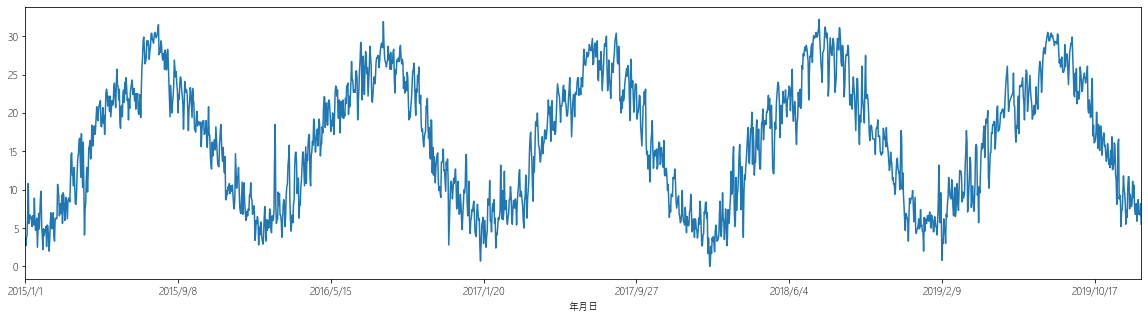

In [24]:
weather_df['平均気温(℃)'].plot()

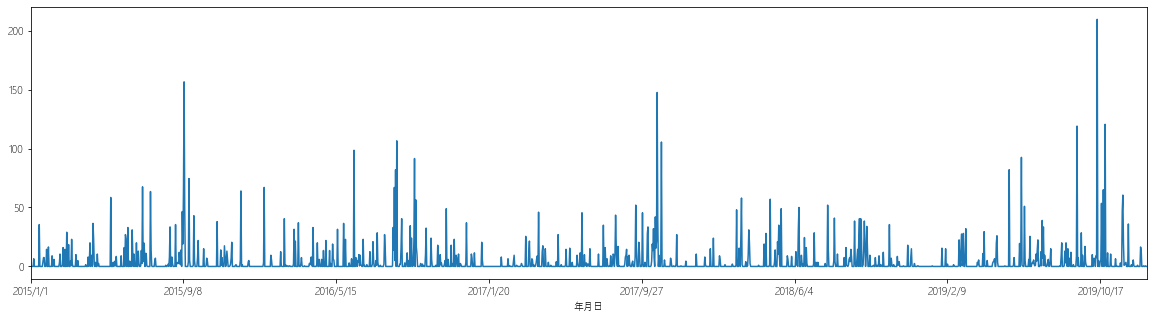

In [25]:
weather_df['降水量の合計(mm)'].plot()

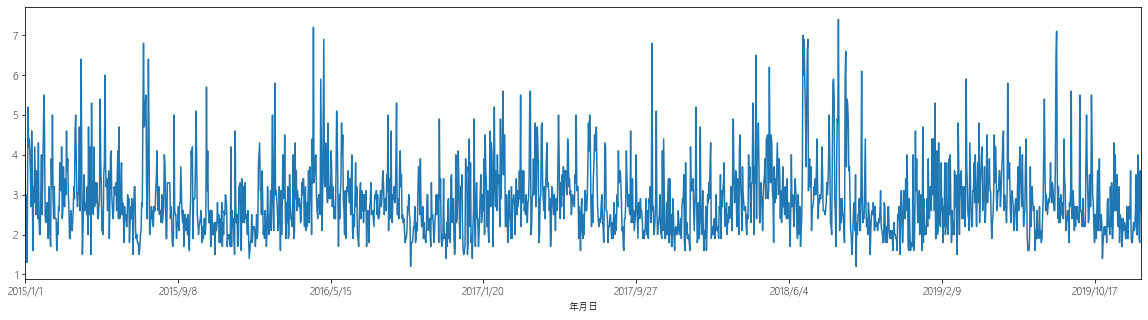

In [26]:
weather_df['平均風速(m/s)'].plot()

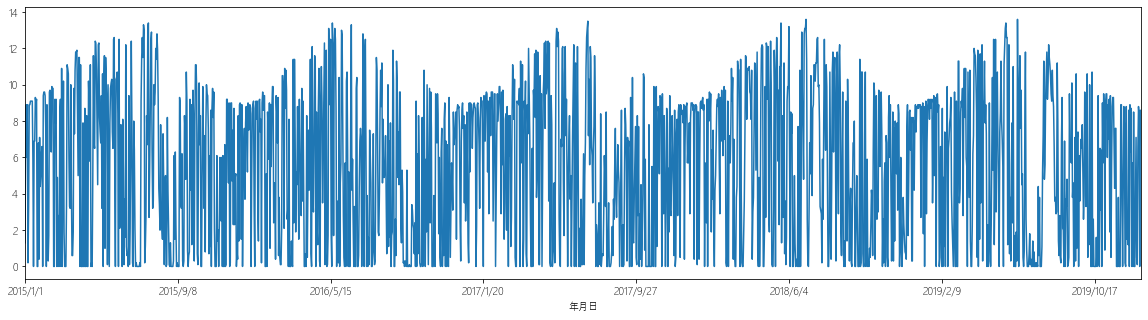

In [27]:
weather_df['日照時間(時間)'].plot()

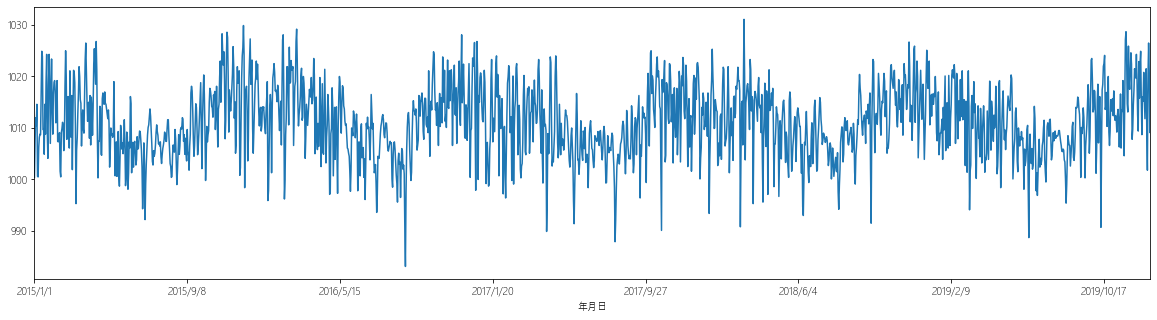

In [28]:
weather_df['平均現地気圧(hPa)'].plot()

## 定常性の分析

定常性：時間や位置によってその確率分布が変化しないという確率過程の性質

非定常のデータは分析には適しません。定常過程に変換してやることで初めて分析可能になります。

よって、時系列データを扱うときは、まず定常性の検定を行い、非定常過程なら定常過程に変換してやる必要があります。

有名な検定方法として、**ADF検定**があります。

ADF検定は、帰無仮説を単位根過程、対立仮説を定常過程とした検定です。

よって、P値が0.05以下なら、帰無仮説が棄却され、「定常過程」となります。


### 単位根過程とは

原系列 Yt が非定常過程であり、差分系列ΔYt = Yt − Yt−1 が定常過程であるとき、過程は単位根過程といわれる

In [34]:
# ライブラリの読み込み
from statsmodels.tsa import stattools

In [44]:
# ADF検定のP値の求め方
stattools.adfuller(weather_df['平均現地気圧(hPa)'])[1]

0.0075810935964328325

In [43]:
adf_df=pd.DataFrame(
    [
        stattools.adfuller(weather_df['平均気温(℃)'])[1],
        stattools.adfuller(weather_df['降水量の合計(mm)'])[1],
        stattools.adfuller(weather_df['平均風速(m/s)'])[1],
        stattools.adfuller(weather_df['日照時間(時間)'])[1],
        stattools.adfuller(weather_df['平均現地気圧(hPa)'])[1]
    ],
    index=['平均気温(℃)','降水量の合計(mm)','平均風速(m/s)','日照時間(時間)','平均現地気圧(hPa)'],
    columns=['P値']
)
adf_df

,P値
平均気温(℃),2.140411e-01
降水量の合計(mm),1.766563e-16
平均風速(m/s),1.899823e-08
日照時間(時間),9.449214e-30
平均現地気圧(hPa),7.581094e-03


0.21404112008084653

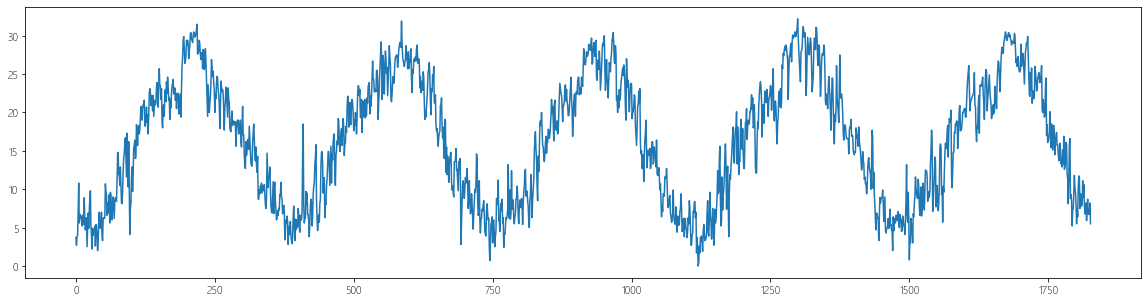

In [53]:
x=[]
for index,i in enumerate(weather_df['平均気温(℃)'].values):
    if index%1==0:
        x.append(i)
plt.plot(x)
stattools.adfuller(x)[1]

0.0021115517947328352

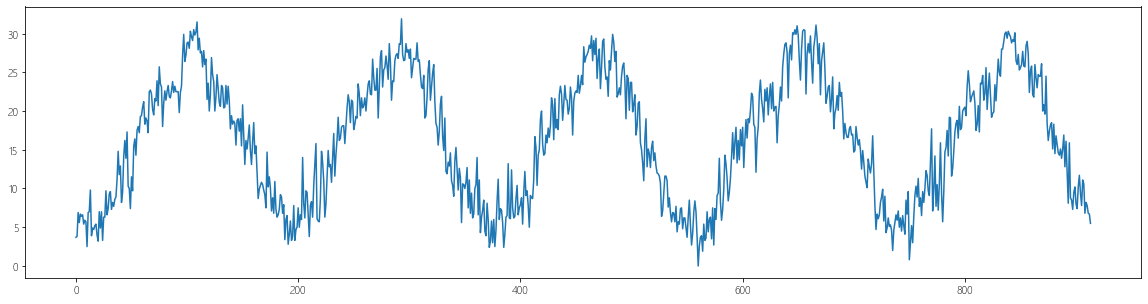

In [54]:
x=[]
for index,i in enumerate(weather_df['平均気温(℃)'].values):
    if index%2==0:
        x.append(i)
plt.plot(x)
stattools.adfuller(x)[1]

3.319704543964498e-05

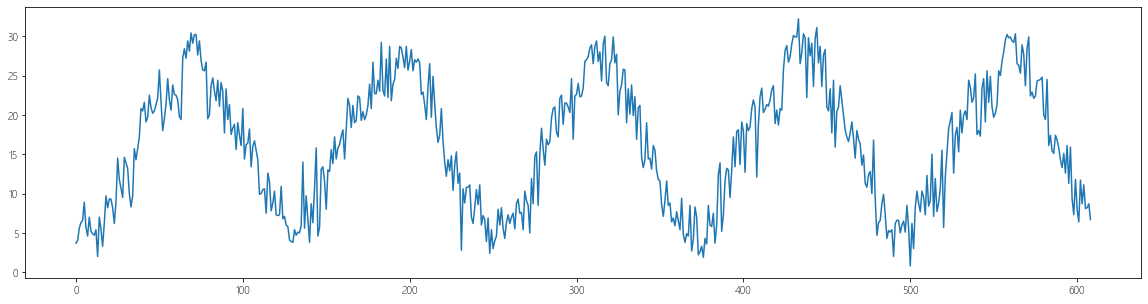

In [55]:
x=[]
for index,i in enumerate(weather_df['平均気温(℃)'].values):
    if index%3==0:
        x.append(i)
plt.plot(x)
stattools.adfuller(x)[1]

1.4988464305482135e-07

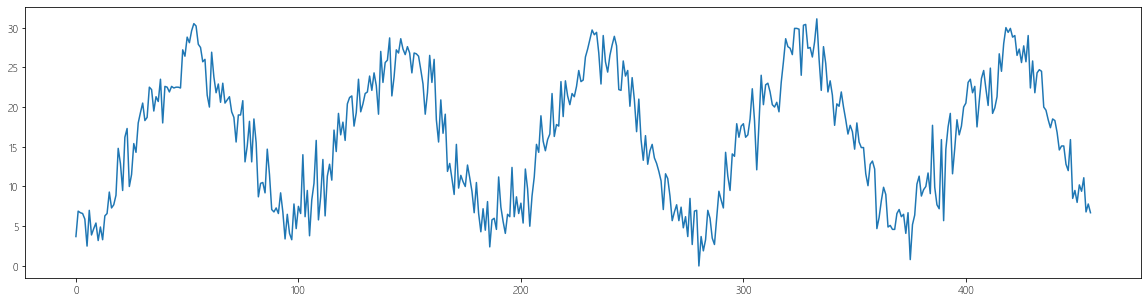

In [56]:
x=[]
for index,i in enumerate(weather_df['平均気温(℃)'].values):
    if index%4==0:
        x.append(i)
plt.plot(x)
stattools.adfuller(x)[1]

3.3989080714641115e-08

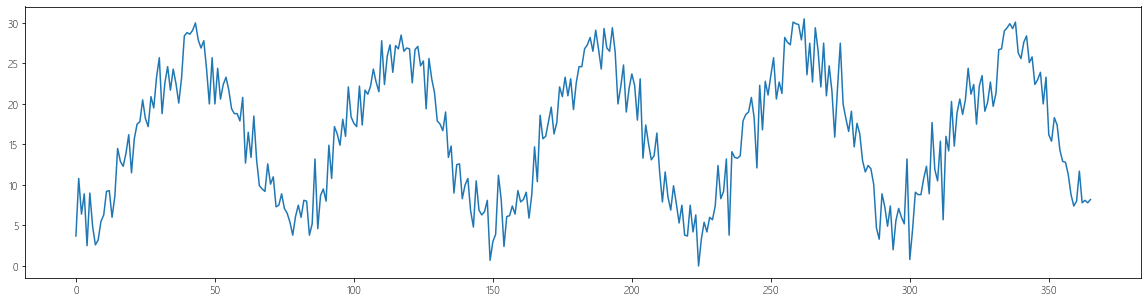

In [57]:
x=[]
for index,i in enumerate(weather_df['平均気温(℃)'].values):
    if index%5==0:
        x.append(i)
plt.plot(x)
stattools.adfuller(x)[1]

7.589521785952348e-09

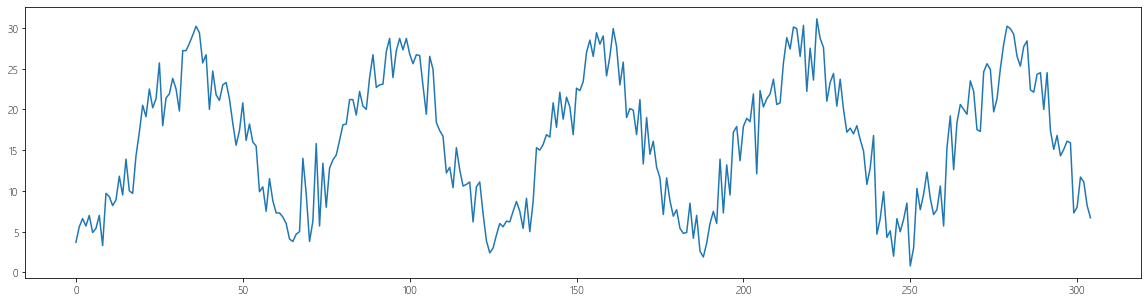

In [58]:
x=[]
for index,i in enumerate(weather_df['平均気温(℃)'].values):
    if index%6==0:
        x.append(i)
plt.plot(x)
stattools.adfuller(x)[1]

7.926275727820842e-11

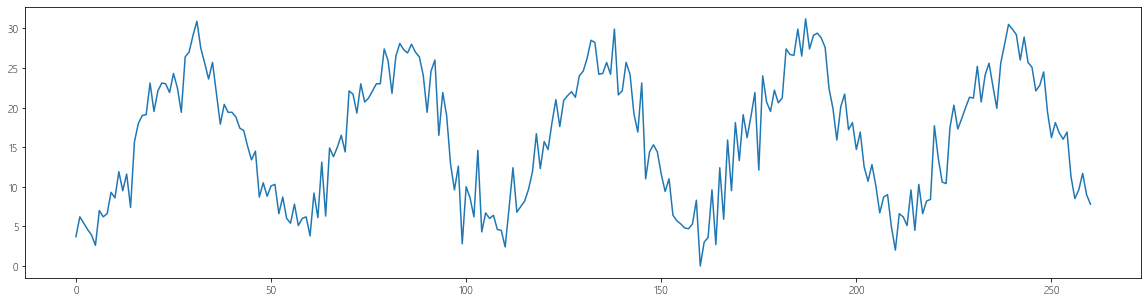

In [59]:
x=[]
for index,i in enumerate(weather_df['平均気温(℃)'].values):
    if index%7==0:
        x.append(i)
plt.plot(x)
stattools.adfuller(x)[1]